In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import imgaug.augmenters as iaa
from skimage import io
from tensorflow.keras.optimizers import Adam

In [2]:
import os

root=r'C:\Users\harsh\Desktop\Gray_scale'

for i in range(0,16):
    os.mkdir(os.path.join(root, f'signature_{i+1}'))


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

data_dir = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\harsh\\Desktop\\Handwritten Signature Data\\Data\\subject_1\\signature_10.jpg' -> 'C:\\Users\\harsh\\Desktop\\Handwritten Signature Data\\Data\\subject_1\\signature_2.jpg'

In [4]:
import imgaug.augmenters as iaa
import imgaug.augmenters.flip as flip

def load_and_augment_data(folder_path, num_augmentations=20):
    # Initialize the augmenter
    augmenter = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25), scale=(0.8, 1.2)),
        flip.Fliplr(p=0.5)
    ])
    
    # Load the data from the folder
    X = []
    y = []
    classes = os.listdir(folder_path)
    for i, cls in enumerate(classes):
        cls_path = os.path.join(folder_path, cls)
        images = os.listdir(cls_path)
        for img in images:
            img_path = os.path.join(cls_path, img)
            # Load the image
            image = io.imread(img_path)
            # Apply the augmentation and save the new images
            for j in range(num_augmentations):
                aug_image = augmenter.augment_image(image)
                X.append(aug_image)
                y.append(i)
    
    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    return X, y



In [5]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
# from google.colab.patches import cv2_imshow 

directory = r"C:\Users\harsh\Desktop\Handwritten Signature Data\Data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= r'C:\Users\Harsh\Desktop\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

1 subject_1
C:\Users\Harsh\Desktop\gray_scale\signature_1
2 subject_10
C:\Users\Harsh\Desktop\gray_scale\signature_2
3 subject_11
C:\Users\Harsh\Desktop\gray_scale\signature_3
4 subject_12
C:\Users\Harsh\Desktop\gray_scale\signature_4
5 subject_13
C:\Users\Harsh\Desktop\gray_scale\signature_5
6 subject_14
C:\Users\Harsh\Desktop\gray_scale\signature_6
7 subject_15
C:\Users\Harsh\Desktop\gray_scale\signature_7
8 subject_16
C:\Users\Harsh\Desktop\gray_scale\signature_8
9 subject_2
C:\Users\Harsh\Desktop\gray_scale\signature_9
10 subject_3
C:\Users\Harsh\Desktop\gray_scale\signature_10
11 subject_4
C:\Users\Harsh\Desktop\gray_scale\signature_11
12 subject_5
C:\Users\Harsh\Desktop\gray_scale\signature_12
13 subject_6
C:\Users\Harsh\Desktop\gray_scale\signature_13
14 subject_7
C:\Users\Harsh\Desktop\gray_scale\signature_14
15 subject_8
C:\Users\Harsh\Desktop\gray_scale\signature_15
16 subject_9
C:\Users\Harsh\Desktop\gray_scale\signature_16


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')


In [7]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline(r'C:\Users\harsh\Desktop\Gray_scale')  # gray image source path

Initialised with 159 image(s) found.
Output directory set to C:\Users\harsh\Desktop\Gray_scale\output.

In [8]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [9]:
p.sample(1600)

Processing <PIL.Image.Image image mode=L size=519x276 at 0x1C4B11B9E90>: 100%|██████████| 1600/1600 [00:05<00:00, 316.98 Samples/s] 


In [10]:
# To rename Augmented Data

data_dir = r'C:\Users\harsh\Desktop\Gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

None


In [11]:
import splitfolders
input_folder = r"C:\Users\harsh\Desktop\Gray_scale\output"
splitfolders.ratio (input_folder, output=r"C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_65_35",
                seed=42, ratio=(.80,.20),
                group_prefix=None)

Copying files: 1600 files [00:04, 330.71 files/s]


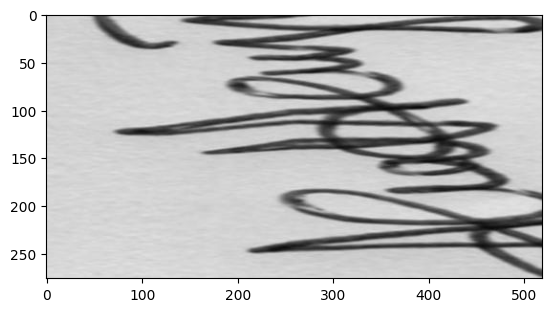

In [12]:
import keras.utils as image
import matplotlib.pyplot as plt
img = image.load_img(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_65_35\train\subject_1\signature_11.jpg')
plt.imshow(img)
# print(img.shape)

In [13]:
print(cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_65_35\train\subject_1\signature_11.jpg').shape)
cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_65_35\train\subject_1\signature_11.jpg')

(276, 519, 3)


array([[[212, 212, 212],
        [212, 212, 212],
        [211, 211, 211],
        ...,
        [222, 222, 222],
        [223, 223, 223],
        [223, 223, 223]],

       [[211, 211, 211],
        [211, 211, 211],
        [210, 210, 210],
        ...,
        [223, 223, 223],
        [221, 221, 221],
        [219, 219, 219]],

       [[210, 210, 210],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [218, 218, 218]],

       ...,

       [[217, 217, 217],
        [217, 217, 217],
        [218, 218, 218],
        ...,
        [105, 105, 105],
        [ 91,  91,  91],
        [ 82,  82,  82]],

       [[215, 215, 215],
        [215, 215, 215],
        [215, 215, 215],
        ...,
        [151, 151, 151],
        [137, 137, 137],
        [128, 128, 128]],

       [[214, 214, 214],
        [214, 214, 214],
        [215, 215, 215],
        ...,
        [183, 183, 183],
        [172, 172, 172],
        [166, 166, 166]]

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)


In [16]:
train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_65_35//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Project//Handwritten Signature Data//splitted_gray_data_65_35//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1599 images belonging to 16 classes.
Found 568 images belonging to 16 classes.


In [17]:
batch_size=50

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_65_35//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

# same generator for validation data
validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Project//Handwritten Signature Data//splitted_gray_data_65_35//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

num_samples = len(train_generator)
X_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    X_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

Found 1599 images belonging to 16 classes.
Found 568 images belonging to 16 classes.


# 25 EPOCH

In [18]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 25
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/25
39/39 [==============================] - 5s 103ms/step - loss: 2.8521 - accuracy: 0.0694 - val_loss: 2.7998 - val_accuracy: 0.0810
Epoch 2/25
39/39 [==============================] - 4s 100ms/step - loss: 2.7973 - accuracy: 0.0707 - val_loss: 2.7681 - val_accuracy: 0.0651
Epoch 3/25
39/39 [==============================] - 4s 99ms/step - loss: 2.7719 - accuracy: 0.0719 - val_loss: 2.7862 - val_accuracy: 0.0863
Epoch 4/25
39/39 [==============================] - 4s 101ms/step - loss: 2.7764 - accuracy: 0.0851 - val_loss: 2.7772 - val_accuracy: 0.0739
Epoch 5/25
39/39 [==============================] - 4s 102ms/step - loss: 2.7835 - accuracy: 0.0794 - val_loss: 2.7601 - val_accuracy: 0.0792
Epoch 6/25
39/39 [==============================] - 4s 101ms/step - loss: 2.7701 - accuracy: 0.0901 - val_loss: 2.7569 - val_accuracy: 0.0863
Epoch 7/25
39/39 [==============================] - 4s 102ms/step - loss: 2.7602 - accuracy: 0.0944 - val_loss: 2.7601 - val_accuracy: 0.0757
Epoch 8

In [19]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

18/18 [==============================] - 1s 35ms/step - loss: 2.7141 - accuracy: 0.1162
Test Loss: 2.714141845703125
Test Accuracy: 0.11619718372821808
18/18 [==============================] - 1s 36ms/step


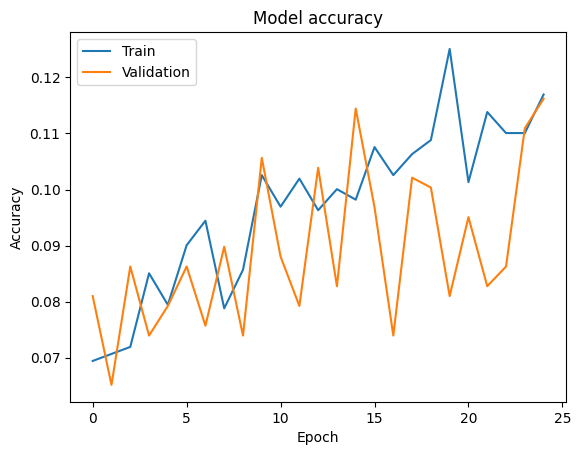

In [20]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


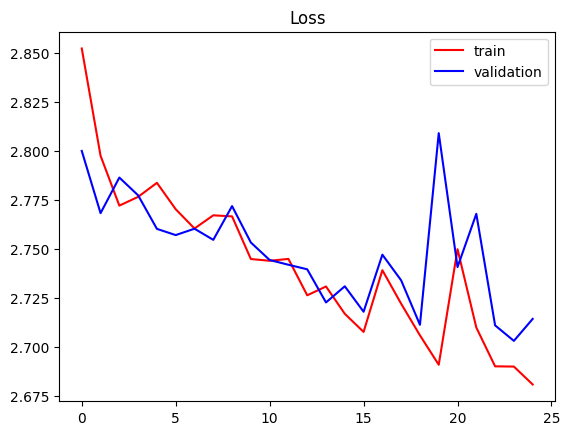

In [21]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [22]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 1s 36ms/step
Confusion Matrix:
[[ 0  0  0  4  0  5  4  0  0  0  0  8  0 12  0  0]
 [ 0  0  0  7  0  1  2  0  0  0  0  7  0 20  0  0]
 [ 0  0  0  3  0  2  2  0  0  0  0  9  0 17  1  0]
 [ 0  0  0 12  0  1  4  0  0  0  0  5  0 15  0  0]
 [ 1  0  0  0  0  3  2  0  0  0  0 12  0 16  0  0]
 [ 0  0  0  1  0 14  0  0  1  0  0  6  0 11  0  0]
 [ 0  0  0  8  0  6  7  0  0  0  0  7  0 18  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0 16  0 15  0  0]
 [ 0  0  0  3  0  2  2  0  0  0  0 10  0 19  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  5  0 10  0  1]
 [ 0  0  0  1  0  4  4  0  0  0  0  9  0 19  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  9  0 23  0  0]
 [ 0  0  0  3  0  2  0  0  0  0  0 11  0 16  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0 10  0 24  0  0]
 [ 0  0  0  1  0  3  0  0  0  0  0  9  0 20  0  0]
 [ 0  0  0  3  0  5  1  0  0  0  0 11  0 20  0  0]]


18/18 [==============================] - 1s 36ms/step


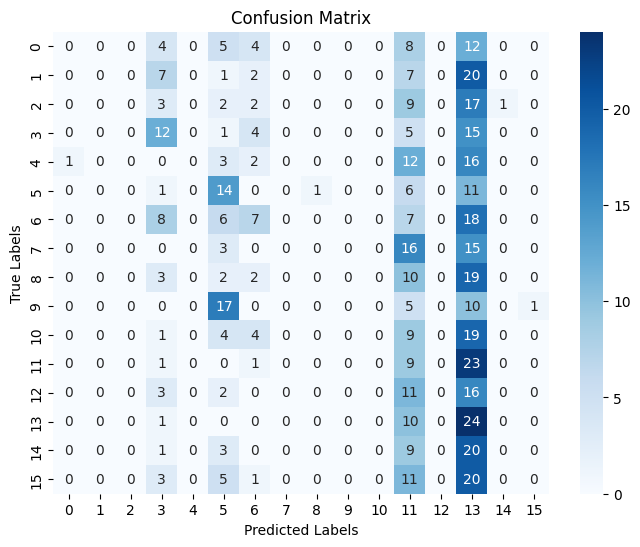

In [23]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 1: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 2: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 3: TPR = 0.3243, FPR = 0.0678, TNR = 0.9322, FNR = 0.6757
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.4242, FPR = 0.1009, TNR = 0.8991, FNR = 0.5758
Class 6: TPR = 0.1522, FPR = 0.0421, TNR = 0.9579, FNR = 0.8478
Class 7: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 8: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 11: TPR = 0.2647, FPR = 0.2528, TNR = 0.7472, FNR = 0.7353
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.6857, FPR = 0.4709, TNR = 0.5291, FNR = 0.3143
Class 14: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.001

C:\Users\harsh\AppData\Local\Temp\ipykernel_6212\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\harsh\AppData\Local\Temp\ipykernel_6212\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


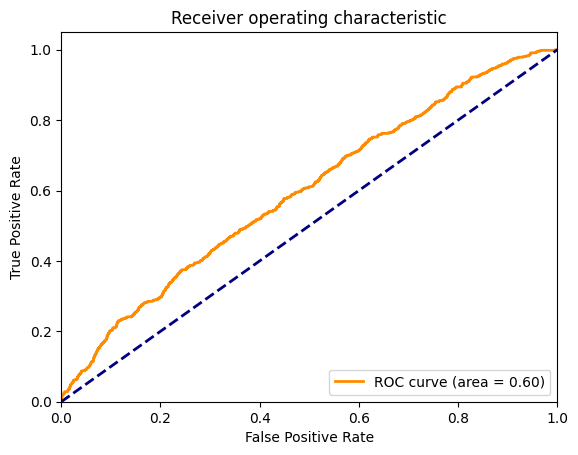

In [25]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 1s 35ms/step - loss: 2.7141 - accuracy: 0.1162
Test Loss: 2.714141845703125
Test Accuracy: 0.11619718372821808
18/18 [==============================] - 1s 34ms/step
AUC for class 0: 0.4850
AUC for class 1: 0.5121
AUC for class 2: 0.5482
AUC for class 3: 0.7299
AUC for class 4: 0.5201
AUC for class 5: 0.7414
AUC for class 6: 0.6161
AUC for class 7: 0.6198
AUC for class 8: 0.6657
AUC for class 9: 0.8071
AUC for class 10: 0.5480
AUC for class 11: 0.6199
AUC for class 12: 0.5332
AUC for class 13: 0.5960
AUC for class 14: 0.5775
AUC for class 15: 0.4799


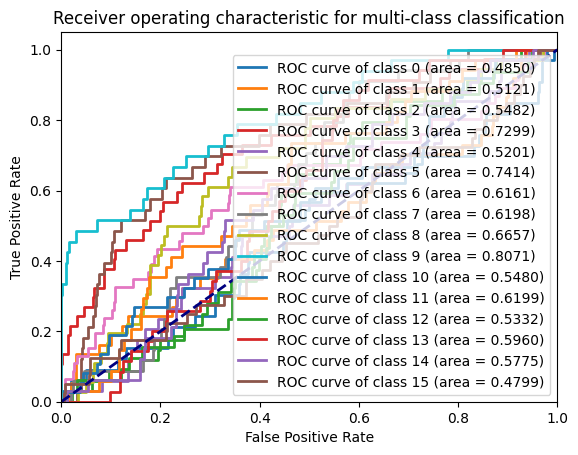

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# 30 EPOCHS

In [28]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 30
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/30
31/31 [==============================] - 4s 111ms/step - loss: 2.8956 - accuracy: 0.0652 - val_loss: 2.8276 - val_accuracy: 0.0669
Epoch 2/30
31/31 [==============================] - 3s 113ms/step - loss: 2.7992 - accuracy: 0.0691 - val_loss: 2.7600 - val_accuracy: 0.0739
Epoch 3/30
31/31 [==============================] - 4s 115ms/step - loss: 2.7676 - accuracy: 0.0919 - val_loss: 2.7691 - val_accuracy: 0.0739
Epoch 4/30
31/31 [==============================] - 4s 117ms/step - loss: 2.7536 - accuracy: 0.0958 - val_loss: 2.7798 - val_accuracy: 0.0810
Epoch 5/30
31/31 [==============================] - 4s 117ms/step - loss: 2.7449 - accuracy: 0.0848 - val_loss: 2.7478 - val_accuracy: 0.0898
Epoch 6/30
31/31 [==============================] - 4s 119ms/step - loss: 2.7413 - accuracy: 0.0911 - val_loss: 2.7425 - val_accuracy: 0.1092
Epoch 7/30
31/31 [==============================] - 4s 117ms/step - loss: 2.7223 - accuracy: 0.1013 - val_loss: 2.7222 - val_accuracy: 0.1180
Epoch 

In [29]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

18/18 [==============================] - 1s 39ms/step - loss: 2.6550 - accuracy: 0.1320
Test Loss: 2.655014753341675
Test Accuracy: 0.13204225897789001
18/18 [==============================] - 1s 38ms/step


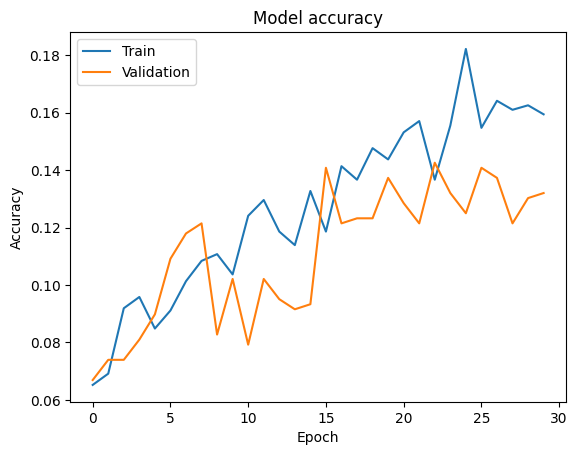

In [30]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


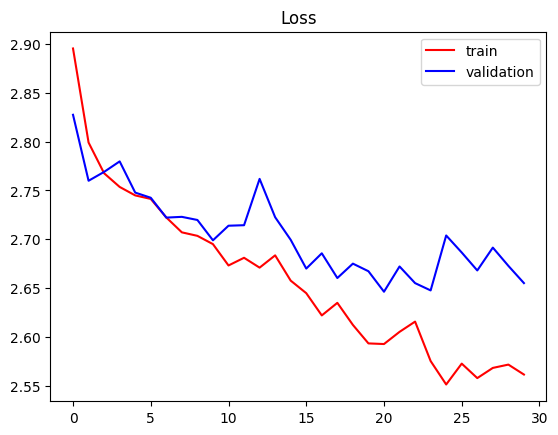

In [31]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [32]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 1s 39ms/step
Confusion Matrix:
[[ 0  1  0  0  0 10  9  0  0  0  0  1  3  1  5  3]
 [ 0  4  0  1  0  3 13  3  2  0  0  4  0  2  4  1]
 [ 0  0  0  1  0  8  5  2  1  0  0  2  2  0  9  4]
 [ 0  3  0  1  0  3 14  5  1  0  0  1  2  3  1  3]
 [ 1  0  0  0  0 12  5  2  0  0  0  3  1  5  3  2]
 [ 0  0  0  0  0 19  5  3  0  0  0  0  1  0  2  3]
 [ 1  1  0  0  0 11 25  2  0  0  0  0  0  0  1  5]
 [ 0  0  0  0  0 14  4  5  1  0  0  0  0  1  7  2]
 [ 0  1  0  0  0  3 11  4  3  0  0  2  1  3  3  5]
 [ 0  0  0  0  0 19  3  3  0  0  0  1  0  0  4  3]
 [ 0  1  0  0  0 16  8  0  1  0  0  1  1  4  2  3]
 [ 0  1  0  0  0  5  9  6  2  0  0  1  0  2  7  1]
 [ 0  0  0  0  0 13  9  3  0  0  0  1  0  1  3  2]
 [ 0  0  0  0  0  5  7  8  0  0  0  2  1  3  8  1]
 [ 0  0  0  0  0 11  4  5  0  0  0  0  3  3  6  1]
 [ 0  0  0  1  0 14  9  4  1  0  0  0  1  1  1  8]]


18/18 [==============================] - 1s 40ms/step


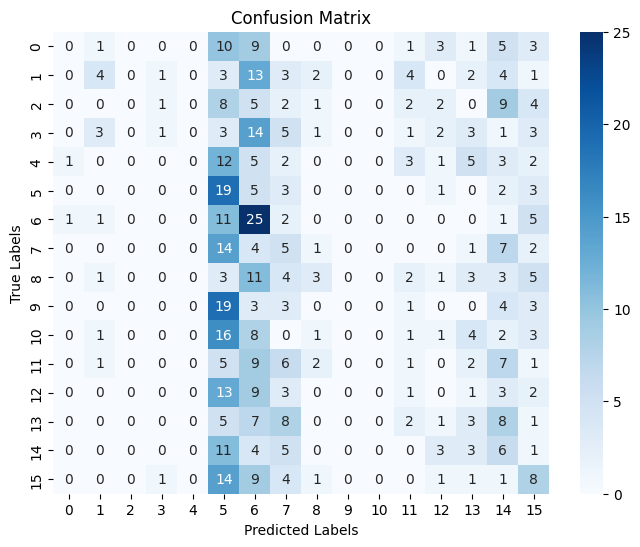

In [33]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0037, TNR = 0.9963, FNR = 1.0000
Class 1: TPR = 0.1081, FPR = 0.0151, TNR = 0.9849, FNR = 0.8919
Class 2: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 3: TPR = 0.0270, FPR = 0.0056, TNR = 0.9944, FNR = 0.9730
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.5758, FPR = 0.2748, TNR = 0.7252, FNR = 0.4242
Class 6: TPR = 0.5435, FPR = 0.2203, TNR = 0.7797, FNR = 0.4565
Class 7: TPR = 0.1471, FPR = 0.0936, TNR = 0.9064, FNR = 0.8529
Class 8: TPR = 0.0833, FPR = 0.0169, TNR = 0.9831, FNR = 0.9167
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 11: TPR = 0.0294, FPR = 0.0337, TNR = 0.9663, FNR = 0.9706
Class 12: TPR = 0.0000, FPR = 0.0299, TNR = 0.9701, FNR = 1.0000
Class 13: TPR = 0.0857, FPR = 0.0488, TNR = 0.9512, FNR = 0.9143
Class 14: TPR = 0.1818, FPR = 0.1121, TNR = 0.8879, FNR = 0.8182
Class 15: TPR = 0.2000, FPR = 0.073

C:\Users\harsh\AppData\Local\Temp\ipykernel_25908\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\harsh\AppData\Local\Temp\ipykernel_25908\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


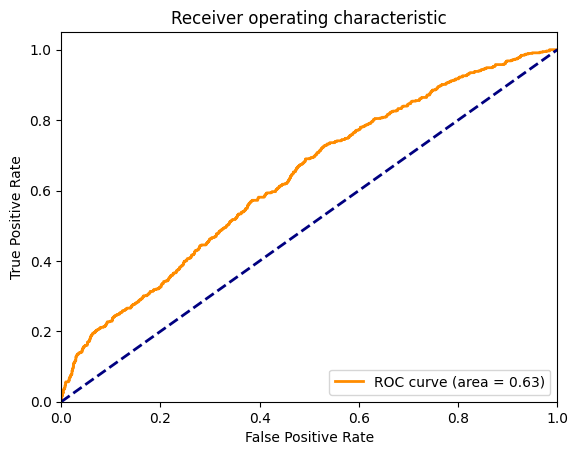

In [36]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 1s 37ms/step - loss: 2.6550 - accuracy: 0.1320
Test Loss: 2.655014753341675
Test Accuracy: 0.13204225897789001
18/18 [==============================] - 1s 36ms/step
AUC for class 0: 0.5202
AUC for class 1: 0.6577
AUC for class 2: 0.5839
AUC for class 3: 0.6913
AUC for class 4: 0.6020
AUC for class 5: 0.7490
AUC for class 6: 0.6970
AUC for class 7: 0.6565
AUC for class 8: 0.6920
AUC for class 9: 0.8356
AUC for class 10: 0.4893
AUC for class 11: 0.6998
AUC for class 12: 0.5044
AUC for class 13: 0.6581
AUC for class 14: 0.6210
AUC for class 15: 0.5846


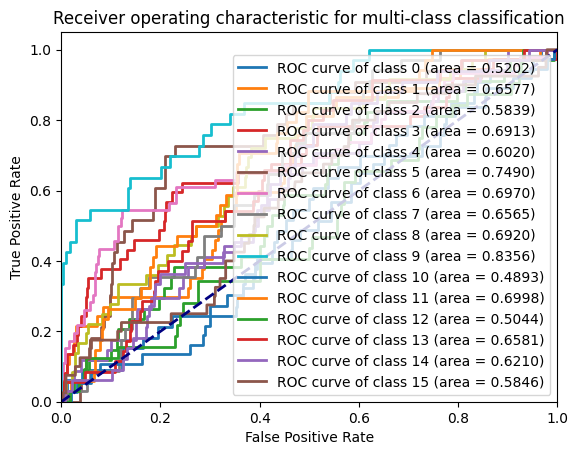

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# EPOCH 35

In [38]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 35
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/35
31/31 [==============================] - 4s 109ms/step - loss: 2.8944 - accuracy: 0.0573 - val_loss: 2.7716 - val_accuracy: 0.0757
Epoch 2/35
31/31 [==============================] - 3s 105ms/step - loss: 2.7784 - accuracy: 0.0762 - val_loss: 2.7570 - val_accuracy: 0.1004
Epoch 3/35
31/31 [==============================] - 3s 106ms/step - loss: 2.7596 - accuracy: 0.0738 - val_loss: 2.7588 - val_accuracy: 0.0651
Epoch 4/35
31/31 [==============================] - 3s 110ms/step - loss: 2.7553 - accuracy: 0.0848 - val_loss: 2.7396 - val_accuracy: 0.0898
Epoch 5/35
31/31 [==============================] - 4s 117ms/step - loss: 2.7460 - accuracy: 0.0951 - val_loss: 2.7292 - val_accuracy: 0.0863
Epoch 6/35
31/31 [==============================] - 4s 115ms/step - loss: 2.7283 - accuracy: 0.0927 - val_loss: 2.7363 - val_accuracy: 0.0898
Epoch 7/35
31/31 [==============================] - 4s 115ms/step - loss: 2.7315 - accuracy: 0.0990 - val_loss: 2.7214 - val_accuracy: 0.0915
Epoch 

KeyboardInterrupt: 

In [ ]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

18/18 [==============================] - 1s 38ms/step - loss: 2.7735 - accuracy: 0.1109
Test Loss: 2.7735133171081543
Test Accuracy: 0.11091548949480057
18/18 [==============================] - 1s 38ms/step


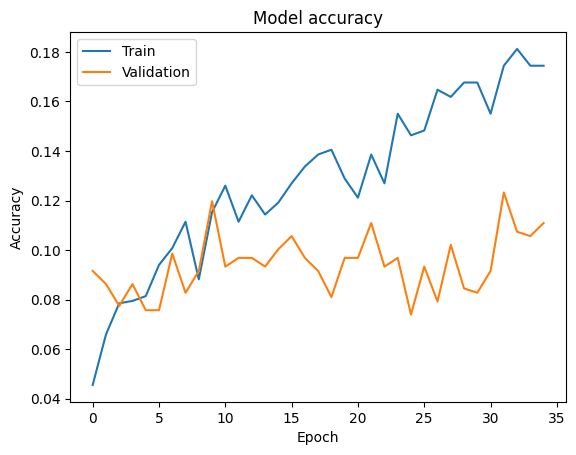

In [44]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


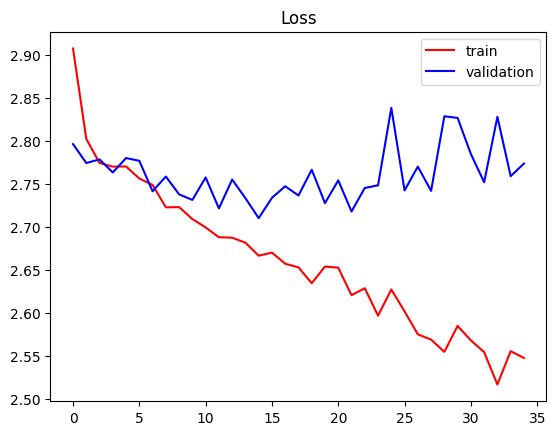

In [45]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [46]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 1s 38ms/step
Confusion Matrix:
[[ 0  8  0  7  2  0  0  6  2  4  0  0  1  1  1  1]
 [ 0  7  0 13  4  0  0  6  1  1  0  0  0  1  2  2]
 [ 1  7  0  5  4  0  0 10  2  1  0  0  0  1  1  2]
 [ 0  5  0 10  3  0  3  6  2  0  0  0  1  0  0  7]
 [ 0  8  0  8  5  0  0 10  1  2  0  0  0  0  0  0]
 [ 0  3  0  2  1  0  0 14  2  7  0  0  0  0  1  3]
 [ 1  4  0 13  3  0  2  8  2  4  3  0  1  0  1  4]
 [ 0  8  0  0  5  0  2 18  0  0  0  0  0  0  0  1]
 [ 0 16  0  3  3  0  2  6  1  0  0  0  1  1  1  2]
 [ 0  5  0  0  5  0  0  9  0 13  0  0  0  0  0  1]
 [ 1  8  0  5  3  0  0 16  1  0  1  0  0  0  0  2]
 [ 1  8  0  4  5  0  0 12  2  0  0  0  0  0  0  2]
 [ 0  2  0  2  5  0  1 17  2  0  1  0  0  0  0  2]
 [ 1  6  0  1  7  0  1 15  0  0  3  0  1  0  0  0]
 [ 0  6  0  1  5  0  1 13  1  2  1  0  1  0  1  1]
 [ 1  5  0  7  3  0  1 14  1  1  2  0  0  0  0  5]]


18/18 [==============================] - 1s 38ms/step


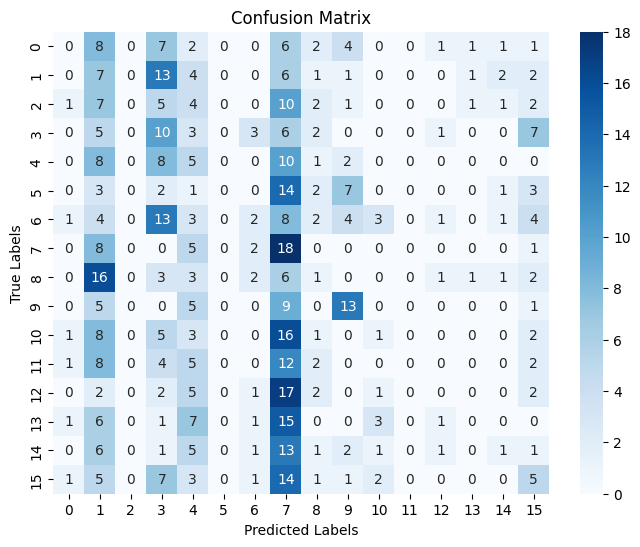

In [47]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0112, TNR = 0.9888, FNR = 1.0000
Class 1: TPR = 0.1892, FPR = 0.1864, TNR = 0.8136, FNR = 0.8108
Class 2: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 3: TPR = 0.2703, FPR = 0.1337, TNR = 0.8663, FNR = 0.7297
Class 4: TPR = 0.1471, FPR = 0.1086, TNR = 0.8914, FNR = 0.8529
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.0435, FPR = 0.0211, TNR = 0.9789, FNR = 0.9565
Class 7: TPR = 0.5294, FPR = 0.3034, TNR = 0.6966, FNR = 0.4706
Class 8: TPR = 0.0278, FPR = 0.0357, TNR = 0.9643, FNR = 0.9722
Class 9: TPR = 0.3939, FPR = 0.0411, TNR = 0.9589, FNR = 0.6061
Class 10: TPR = 0.0270, FPR = 0.0188, TNR = 0.9812, FNR = 0.9730
Class 11: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0112, TNR = 0.9888, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0075, TNR = 0.9925, FNR = 1.0000
Class 14: TPR = 0.0303, FPR = 0.0131, TNR = 0.9869, FNR = 0.9697
Class 15: TPR = 0.1250, FPR = 0.056

C:\Users\harsh\AppData\Local\Temp\ipykernel_11320\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\harsh\AppData\Local\Temp\ipykernel_11320\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


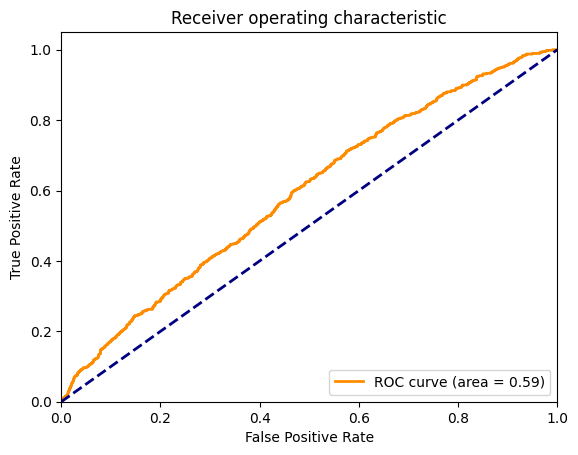

In [49]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 1s 38ms/step - loss: 2.7735 - accuracy: 0.1109
Test Loss: 2.7735133171081543
Test Accuracy: 0.11091548949480057
18/18 [==============================] - 1s 37ms/step
AUC for class 0: 0.5106
AUC for class 1: 0.5901
AUC for class 2: 0.5185
AUC for class 3: 0.6115
AUC for class 4: 0.5321
AUC for class 5: 0.7292
AUC for class 6: 0.5563
AUC for class 7: 0.6008
AUC for class 8: 0.6976
AUC for class 9: 0.8022
AUC for class 10: 0.4375
AUC for class 11: 0.6218
AUC for class 12: 0.5619
AUC for class 13: 0.5472
AUC for class 14: 0.5564
AUC for class 15: 0.5273


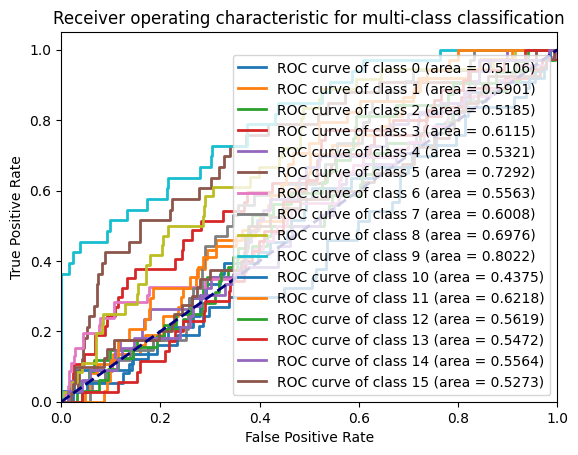

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# 40 EPOCH

In [51]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 40
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/40
25/25 [==============================] - 4s 139ms/step - loss: 2.8991 - accuracy: 0.0572 - val_loss: 2.8073 - val_accuracy: 0.0915
Epoch 2/40
25/25 [==============================] - 4s 156ms/step - loss: 2.7916 - accuracy: 0.0736 - val_loss: 2.7862 - val_accuracy: 0.0669
Epoch 3/40
25/25 [==============================] - 4s 162ms/step - loss: 2.7990 - accuracy: 0.0707 - val_loss: 2.8063 - val_accuracy: 0.0616
Epoch 4/40
25/25 [==============================] - 5s 208ms/step - loss: 2.7915 - accuracy: 0.0746 - val_loss: 2.7790 - val_accuracy: 0.0651
Epoch 5/40
25/25 [==============================] - 5s 209ms/step - loss: 2.7572 - accuracy: 0.0746 - val_loss: 2.7637 - val_accuracy: 0.0757
Epoch 6/40
25/25 [==============================] - 5s 209ms/step - loss: 2.7486 - accuracy: 0.0882 - val_loss: 2.7913 - val_accuracy: 0.0792
Epoch 7/40
25/25 [==============================] - 5s 208ms/step - loss: 2.7335 - accuracy: 0.0940 - val_loss: 2.7718 - val_accuracy: 0.0933
Epoch 

In [52]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

18/18 [==============================] - 1s 58ms/step - loss: 2.8718 - accuracy: 0.0915
Test Loss: 2.8718061447143555
Test Accuracy: 0.09154929220676422
18/18 [==============================] - 1s 58ms/step


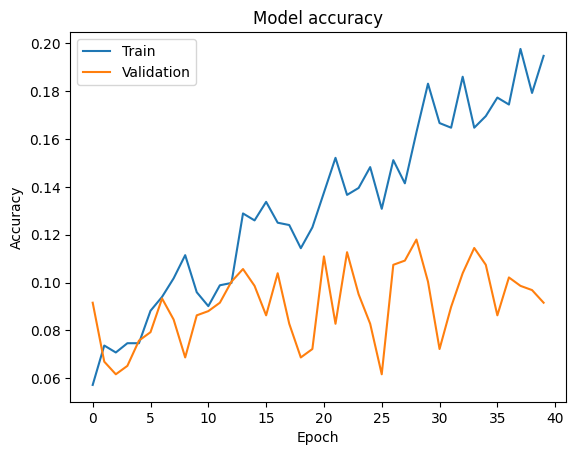

In [53]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


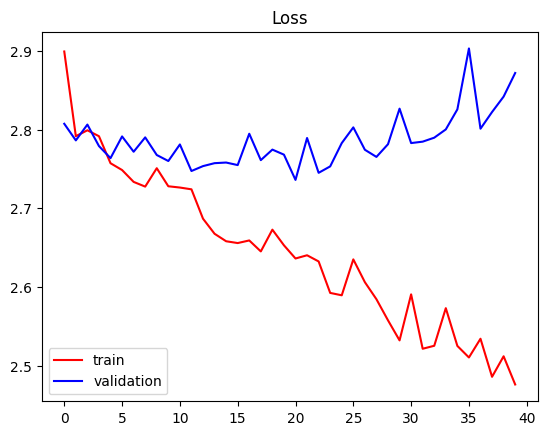

In [54]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [55]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 1s 58ms/step
Confusion Matrix:
[[ 0  0  0  3  1  0  0  1  0 13  5  0  7  0  0  3]
 [ 0  1  2  9  1  1  3  2  0  9  2  1  3  1  0  2]
 [ 0  0  1  3  1  0  0  2  0 12  3  1  7  0  1  3]
 [ 0  2  0  6  2  0  8  0  0  7  4  0  5  0  0  3]
 [ 0  0  0  2  3  0  2  1  0 15  4  0  5  1  0  1]
 [ 0  0  0  2  0  1  1  2  0 22  1  0  1  0  0  3]
 [ 0  0  2  6  2  0  7  0  0 12 10  0  6  0  0  1]
 [ 0  1  2  1  1  0  2  1  0 20  3  0  2  0  0  1]
 [ 0  4  2  2  1  1  2  0  0  7  7  0  5  0  1  4]
 [ 0  0  1  0  1  0  0  3  0 23  2  0  1  0  0  2]
 [ 0  0  2  3  3  0  2  0  1 17  5  0  2  0  0  2]
 [ 0  1  2  5  1  0  2  3  0 15  0  0  3  0  1  1]
 [ 0  0  0  1  1  0  3  0  0 16  8  0  1  0  0  2]
 [ 0  0  0  0  3  0  1  2  0 16  6  0  6  0  0  1]
 [ 0  1  1  1  1  0  2  1  0 18  4  0  3  0  1  0]
 [ 0  1  2  4  0  1  4  0  0 17  6  0  3  0  0  2]]


18/18 [==============================] - 1s 57ms/step


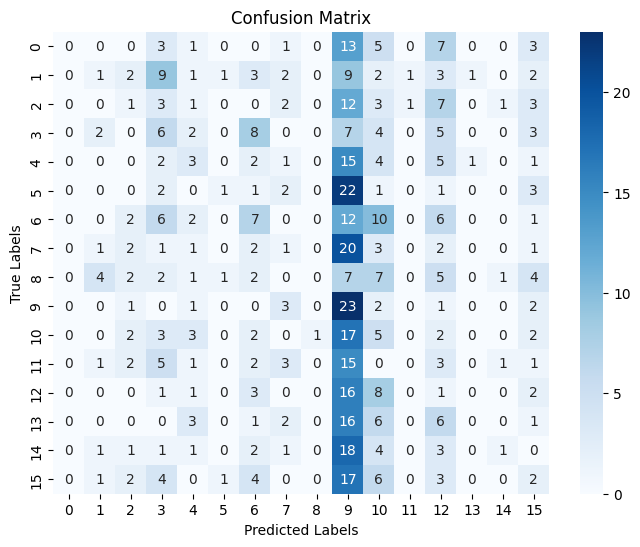

In [56]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.0270, FPR = 0.0188, TNR = 0.9812, FNR = 0.9730
Class 2: TPR = 0.0294, FPR = 0.0300, TNR = 0.9700, FNR = 0.9706
Class 3: TPR = 0.1622, FPR = 0.0791, TNR = 0.9209, FNR = 0.8378
Class 4: TPR = 0.0882, FPR = 0.0356, TNR = 0.9644, FNR = 0.9118
Class 5: TPR = 0.0303, FPR = 0.0056, TNR = 0.9944, FNR = 0.9697
Class 6: TPR = 0.1522, FPR = 0.0613, TNR = 0.9387, FNR = 0.8478
Class 7: TPR = 0.0294, FPR = 0.0318, TNR = 0.9682, FNR = 0.9706
Class 8: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 9: TPR = 0.6970, FPR = 0.4037, TNR = 0.5963, FNR = 0.3030
Class 10: TPR = 0.1351, FPR = 0.1224, TNR = 0.8776, FNR = 0.8649
Class 11: TPR = 0.0000, FPR = 0.0037, TNR = 0.9963, FNR = 1.0000
Class 12: TPR = 0.0312, FPR = 0.1101, TNR = 0.8899, FNR = 0.9688
Class 13: TPR = 0.0000, FPR = 0.0038, TNR = 0.9962, FNR = 1.0000
Class 14: TPR = 0.0303, FPR = 0.0056, TNR = 0.9944, FNR = 0.9697
Class 15: TPR = 0.0500, FPR = 0.054

C:\Users\harsh\AppData\Local\Temp\ipykernel_11320\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\harsh\AppData\Local\Temp\ipykernel_11320\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


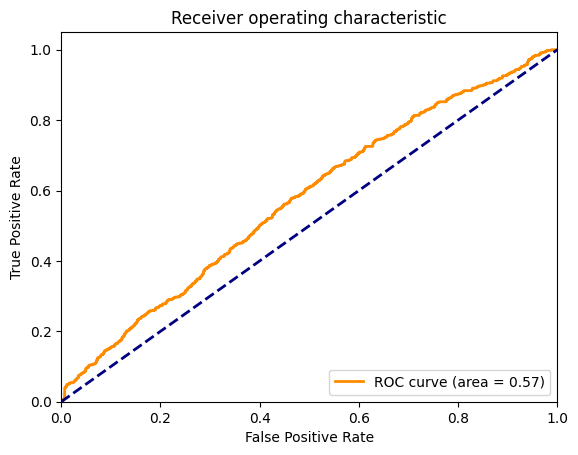

In [58]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 1s 58ms/step - loss: 2.8718 - accuracy: 0.0915
Test Loss: 2.8718061447143555
Test Accuracy: 0.09154929220676422
18/18 [==============================] - 1s 57ms/step
AUC for class 0: 0.4957
AUC for class 1: 0.5710
AUC for class 2: 0.5080
AUC for class 3: 0.6154
AUC for class 4: 0.5421
AUC for class 5: 0.7285
AUC for class 6: 0.5219
AUC for class 7: 0.5780
AUC for class 8: 0.6183
AUC for class 9: 0.7884
AUC for class 10: 0.4863
AUC for class 11: 0.6157
AUC for class 12: 0.5277
AUC for class 13: 0.4781
AUC for class 14: 0.5760
AUC for class 15: 0.5037


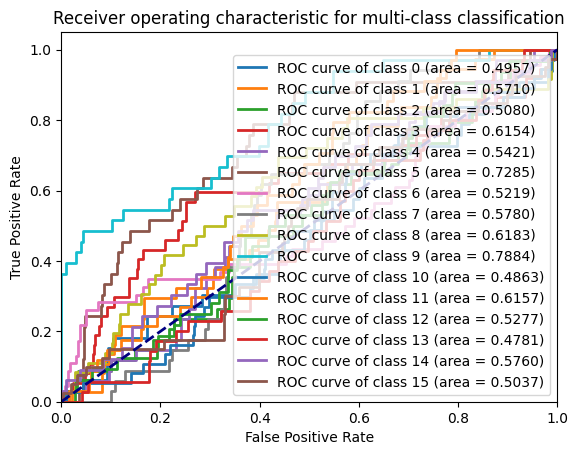

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# 80 EPOCH

In [60]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 80
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/80
25/25 [==============================] - 4s 132ms/step - loss: 2.8755 - accuracy: 0.0581 - val_loss: 2.7855 - val_accuracy: 0.0669
Epoch 2/80
25/25 [==============================] - 3s 120ms/step - loss: 2.7857 - accuracy: 0.0795 - val_loss: 2.7737 - val_accuracy: 0.0739
Epoch 3/80
25/25 [==============================] - 3s 122ms/step - loss: 2.7662 - accuracy: 0.0785 - val_loss: 2.7716 - val_accuracy: 0.0599
Epoch 4/80
25/25 [==============================] - 3s 119ms/step - loss: 2.7457 - accuracy: 0.0901 - val_loss: 2.7669 - val_accuracy: 0.0739
Epoch 5/80
25/25 [==============================] - 3s 119ms/step - loss: 2.7324 - accuracy: 0.1037 - val_loss: 2.7728 - val_accuracy: 0.0898
Epoch 6/80
25/25 [==============================] - 3s 121ms/step - loss: 2.7326 - accuracy: 0.0872 - val_loss: 2.7394 - val_accuracy: 0.0880
Epoch 7/80
25/25 [==============================] - 3s 125ms/step - loss: 2.7112 - accuracy: 0.1095 - val_loss: 2.7512 - val_accuracy: 0.0827
Epoch 

In [61]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

18/18 [==============================] - 1s 39ms/step - loss: 3.1456 - accuracy: 0.0880
Test Loss: 3.1456172466278076
Test Accuracy: 0.08802817016839981
18/18 [==============================] - 1s 39ms/step


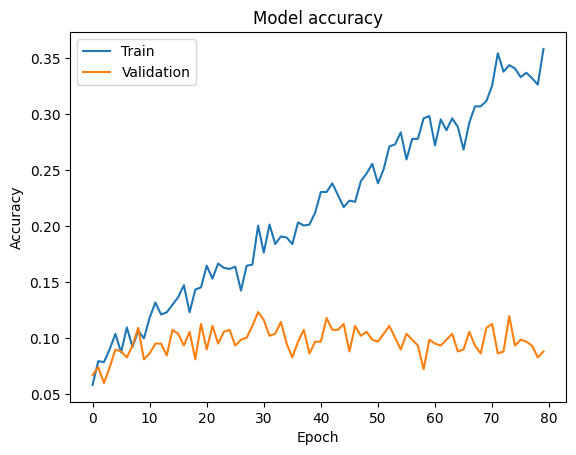

In [62]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


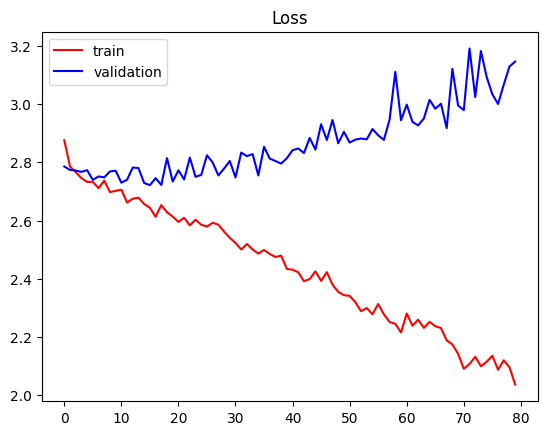

In [63]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [64]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 1s 39ms/step
Confusion Matrix:
[[ 5  0  4  1  1  0  1  3  8  5  1  0  3  1  0  0]
 [10  0  3  4  0  0  1  2  9  2  0  1  1  3  0  1]
 [ 8  2  2  1  0  0  1  3  8  4  0  1  2  1  0  1]
 [ 4  1  2  3  1  0  3  3  8  2  3  0  1  1  0  5]
 [ 8  1  2  2  0  1  4  2  4  5  1  1  1  1  0  1]
 [ 3  0  0  1  0  1  1  3  3 16  1  0  1  1  0  2]
 [ 7  2  1  2  0  0  5  1  8 10  2  0  3  2  1  2]
 [ 8  2  2  0  0  0  1  3  6  8  3  0  0  0  0  1]
 [ 9  0  5  1  0  0  4  1 10  2  0  1  1  0  1  1]
 [ 0  1  4  0  0  0  1  2  2 19  3  0  0  0  0  1]
 [ 9  0  2  1  0  1  2  6  6  6  0  1  1  2  0  0]
 [ 7  1  2  1  1  0  2  3 10  4  0  0  0  0  0  3]
 [12  0  2  0  0  0  2  6  2  4  2  0  0  1  0  1]
 [12  1  0  0  0  1  3  2  5  2  3  2  2  1  0  1]
 [ 6  0  1  0  0  0  2  9  5  4  1  1  1  2  0  1]
 [ 8  1  1  3  0  0  3  4  7  7  2  1  2  0  0  1]]


18/18 [==============================] - 1s 40ms/step


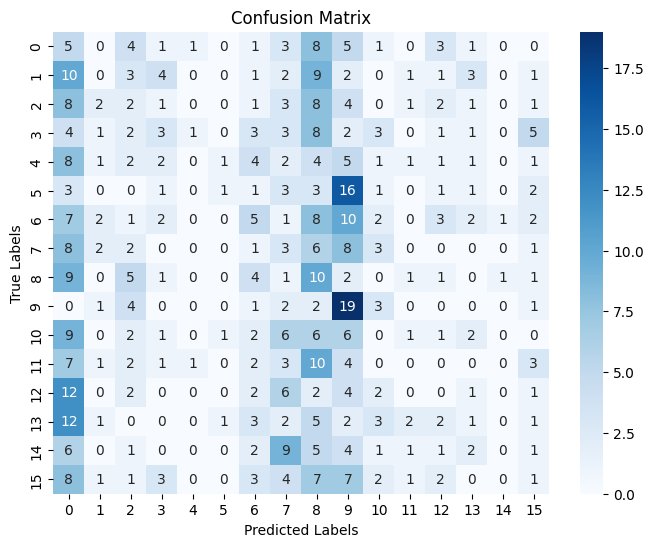

In [65]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.1515, FPR = 0.2075, TNR = 0.7925, FNR = 0.8485
Class 1: TPR = 0.0000, FPR = 0.0226, TNR = 0.9774, FNR = 1.0000
Class 2: TPR = 0.0588, FPR = 0.0581, TNR = 0.9419, FNR = 0.9412
Class 3: TPR = 0.0811, FPR = 0.0320, TNR = 0.9680, FNR = 0.9189
Class 4: TPR = 0.0000, FPR = 0.0056, TNR = 0.9944, FNR = 1.0000
Class 5: TPR = 0.0303, FPR = 0.0056, TNR = 0.9944, FNR = 0.9697
Class 6: TPR = 0.1087, FPR = 0.0594, TNR = 0.9406, FNR = 0.8913
Class 7: TPR = 0.0882, FPR = 0.0936, TNR = 0.9064, FNR = 0.9118
Class 8: TPR = 0.2778, FPR = 0.1711, TNR = 0.8289, FNR = 0.7222
Class 9: TPR = 0.5758, FPR = 0.1514, TNR = 0.8486, FNR = 0.4242
Class 10: TPR = 0.0000, FPR = 0.0414, TNR = 0.9586, FNR = 1.0000
Class 11: TPR = 0.0000, FPR = 0.0169, TNR = 0.9831, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0354, TNR = 0.9646, FNR = 1.0000
Class 13: TPR = 0.0286, FPR = 0.0281, TNR = 0.9719, FNR = 0.9714
Class 14: TPR = 0.0000, FPR = 0.0037, TNR = 0.9963, FNR = 1.0000
Class 15: TPR = 0.0250, FPR = 0.039

C:\Users\harsh\AppData\Local\Temp\ipykernel_11320\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


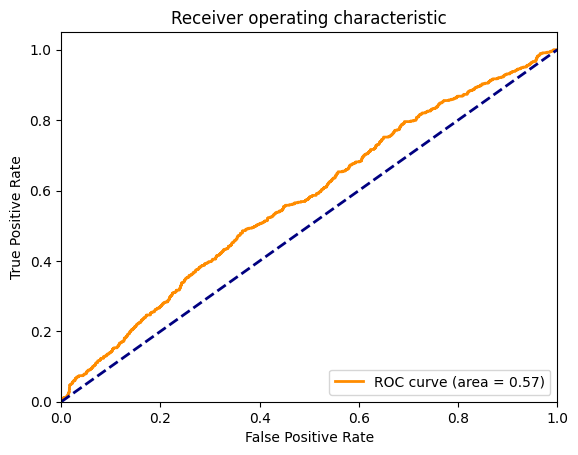

In [67]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 1s 39ms/step - loss: 3.1456 - accuracy: 0.0880
Test Loss: 3.1456172466278076
Test Accuracy: 0.08802817016839981
18/18 [==============================] - 1s 39ms/step
AUC for class 0: 0.4835
AUC for class 1: 0.5055
AUC for class 2: 0.4584
AUC for class 3: 0.5378
AUC for class 4: 0.4968
AUC for class 5: 0.7226
AUC for class 6: 0.5641
AUC for class 7: 0.6191
AUC for class 8: 0.5789
AUC for class 9: 0.8391
AUC for class 10: 0.4581
AUC for class 11: 0.5399
AUC for class 12: 0.5599
AUC for class 13: 0.5720
AUC for class 14: 0.5911
AUC for class 15: 0.5375


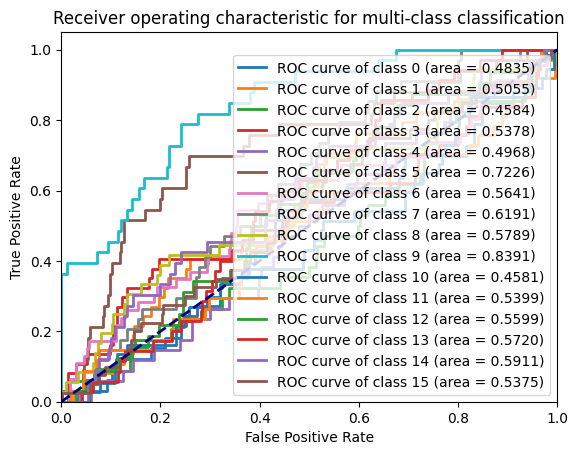

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()